In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [6]:
# read the illinois state shp data
illinois_shp = gpd.read_file('raw_il_census_tracts_shapefile/tl_2019_17_tract.shp')
illinois_shp = illinois_shp.loc[:,('GEOID','ALAND')]
# illinois_shp['centroid'] = illinois_shp.centroid.to_crs(epsg = 4326)
# illinois_shp = pd.DataFrame(illinois_shp)
illinois_shp
illinois_shp.to_csv('GEOID_ALAND.csv')

In [89]:
exposure_df = pd.read_csv("Streetlight_Data/clean_data/dptotal/dptotal_exposure_df.csv")[['FIPS','exposure1','exposure2','exposure3','exposure4']]

# inflow_exposure_df = pd.read_csv("Streetlight_Data/clean_data/dptotal/dptotal_inflow_exposure_df.csv")[['FIPS','inflow_exposure1','inflow_exposure2','inflow_exposure3','inflow_exposure4']]
# inflow_exposure_df
# exposure_df['FIPS'] = str(exposure_df['FIPS'])
exposure_df['GEOID']='1'
for i in range(exposure_df.shape[0]):    
    exposure_df['GEOID'][i] = str(exposure_df['FIPS'][i])
exposure_df = exposure_df[['GEOID','exposure1','exposure2','exposure3','exposure4']]

# inflow_exposure_df['GEOID']='1'
# for i in range(inflow_exposure_df.shape[0]):    
#     inflow_exposure_df['GEOID'][i] = str(inflow_exposure_df['FIPS'][i])
# inflow_exposure_df = inflow_exposure_df[['GEOID','inflow_exposure1','inflow_exposure2','inflow_exposure3','inflow_exposure4']]
# type(inflow_exposure_df['GEOID'][0])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
inflow_exposure_df

,GEOID,inflow_exposure1,inflow_exposure2,inflow_exposure3,inflow_exposure4
0,17001000100,8456.574365,399460.090947,1.683734e+06,5.906668e+07
1,17001000201,941.916652,53569.661382,2.340134e+05,8.661985e+06
2,17001000202,2004.064922,105479.107795,4.539680e+05,1.646978e+07
3,17001000400,2918.783104,149217.505956,6.385035e+05,2.298117e+07
4,17001000500,1126.052540,61786.083836,2.678542e+05,9.828331e+06
...,...,...,...,...,...
2497,17203030501,73098.279858,521999.809430,2.081973e+06,6.644048e+07
2498,17203030502,4123.668549,31819.500863,1.312896e+05,4.451111e+06
2499,17203030601,74788.089252,518115.693724,2.023871e+06,6.332153e+07
2500,17203030602,11794.538887,87348.449984,3.546946e+05,1.176120e+07


In [91]:

# exposure_df["exposure1"] = np.log(1+exposure_df["exposure1"]) * 10**4
# exposure_df["exposure2"] = np.log(1+exposure_df["exposure2"]) * 10**4
# exposure_df["exposure3"] = np.log(1+exposure_df["exposure3"]) * 10**4
# exposure_df["exposure4"] = np.log(1+exposure_df["exposure4"]) * 10**4

exposure_list = ["exposure1", "exposure2", "exposure3", "exposure4"]
for exposure in exposure_list:
    lower = np.quantile(exposure_df[exposure],0.05)
    upper = np.quantile(exposure_df[exposure],0.95)
    exposure_df[exposure_df[exposure] < lower] = 0   
    exposure_df[exposure_df[exposure] > upper] = upper
    

# inflow_exposure_list = ["inflow_exposure1", "inflow_exposure2", "inflow_exposure3", "inflow_exposure4"]
# for exposure in inflow_exposure_list:
#     lower = np.quantile(inflow_exposure_df[exposure],0.05)
#     upper = np.quantile(inflow_exposure_df[exposure],0.95)
#     inflow_exposure_df[inflow_exposure_df[exposure] < lower] = 0   
#     inflow_exposure_df[inflow_exposure_df[exposure] > upper] = upper

In [92]:
exposure_df

,GEOID,exposure1,exposure2,exposure3,exposure4
0,17001000100,0.001941,0.000319,0.000838,0.006664
1,17001000201,0.000384,0.000062,0.000164,0.001351
2,17001000202,0.000660,0.000107,0.000283,0.002302
3,17001000400,0.000880,0.000143,0.000377,0.003059
4,17001000500,0.000418,0.000067,0.000179,0.001462
...,...,...,...,...,...
2497,17203030501,0.010959,0.000454,0.001102,0.007808
2498,17203030502,0.001048,0.000041,0.000101,0.000741
2499,17203030601,0.008321,0.000359,0.000861,0.005981
2500,17203030602,0.002334,0.000094,0.000230,0.001671


In [93]:
# exposure_shp =  gpd.GeoDataFrame(exposure_df)
# illinois_shp[['FIPS','exposure1','exposure2','exposure3','exposure4']] = exposure_df[['FIPS','exposure1','exposure2','exposure3','exposure4']]
# illinois_shp
illinois_shp = pd.merge(illinois_shp, exposure_df, how='left', on="GEOID")
illinois_shp = pd.merge(illinois_shp, inflow_exposure_df, how='left', on="GEOID")

In [94]:
illinois_shp


,GEOID,geometry,centroid,exposure1,exposure2,exposure3,exposure4,inflow_exposure1,inflow_exposure2,inflow_exposure3,inflow_exposure4
0,17091011700,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",POINT (-87.87355 41.12949),0.000334,0.000871,0.001802,0.002054,693.252042,1.215290e+06,3.823067e+06,1.350174e+07
1,17091011800,"POLYGON ((-87.89410 41.14388, -87.89400 41.143...",POINT (-87.87646 41.13978),0.000325,0.000848,0.001756,0.002001,653.414705,1.165476e+06,3.672842e+06,1.297428e+07
2,17119400951,"POLYGON ((-90.11192 38.70281, -90.11128 38.703...",POINT (-90.09829 38.72763),0.000517,0.000887,0.001782,0.005293,1498.340374,1.278395e+06,3.981105e+06,4.532467e+07
3,17119400952,"POLYGON ((-90.09442 38.72031, -90.09360 38.720...",POINT (-90.08180 38.72984),NaN,NaN,NaN,NaN,278.080532,3.551086e+05,1.131505e+06,1.331772e+07
4,17135957500,"POLYGON ((-89.70369 39.34803, -89.69928 39.348...",POINT (-89.60391 39.38915),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3118,17037000100,"POLYGON ((-88.73488 42.10620, -88.73483 42.106...",POINT (-88.65253 42.10661),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3119,17037001500,"POLYGON ((-88.78378 41.84907, -88.77716 41.860...",POINT (-88.73721 41.88417),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120,17037000400,"POLYGON ((-88.78353 42.06425, -88.78350 42.064...",POINT (-88.68023 42.02216),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3121,17037000300,"POLYGON ((-88.94215 42.06505, -88.94211 42.065...",POINT (-88.86924 41.96281),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
def drawExposure(col, path):
    exposure_map = illinois_shp.plot(
        column=col,
        cmap='Reds',
        edgecolor='white',
        linewidth = 0.8,
        alpha = 0.9, 
        legend = True,

        figsize = (10,10),
                     )
    exposure_map.axis('off')
    plt.savefig(path, dpi = 200)

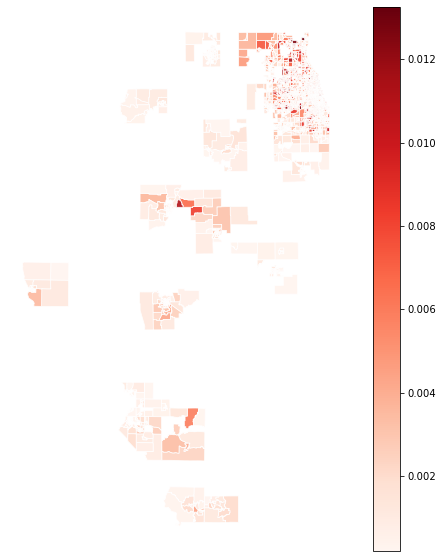

In [96]:
drawExposure(col = "exposure1", path = 'Plots/exposure1_map.png')

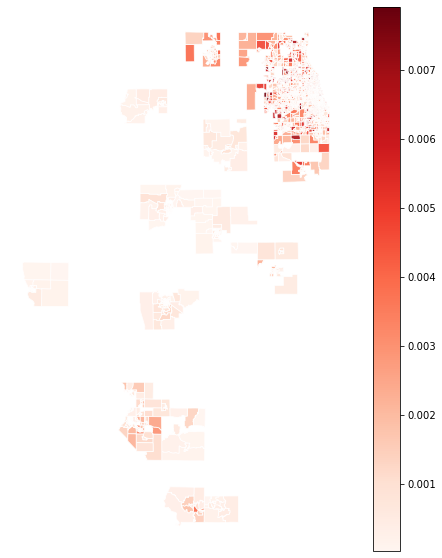

In [97]:
drawExposure(col = "exposure2", path = 'Plots/exposure2_map.png')

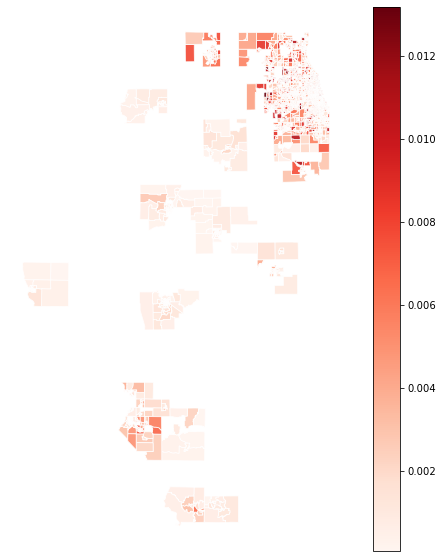

In [98]:
drawExposure(col = "exposure3", path = 'Plots/exposure3_map.png')

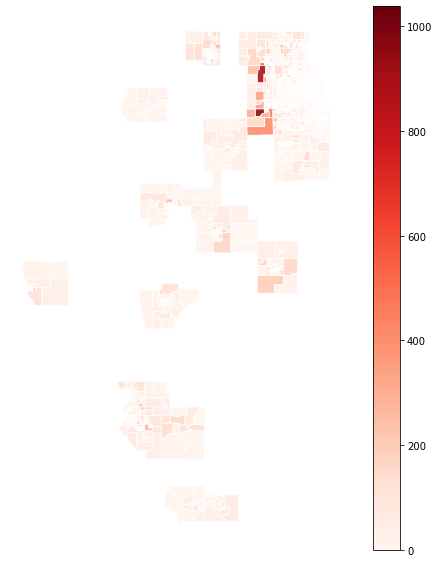

In [77]:
drawExposure(col = "exposure4", path = 'Plots/exposure4_map.png')

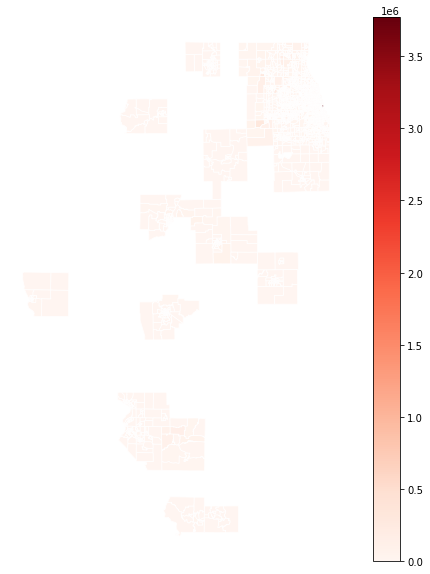

In [54]:
drawExposure(col = "inflow_exposure1", path = 'Plots/inflow_exposure1_map.png')

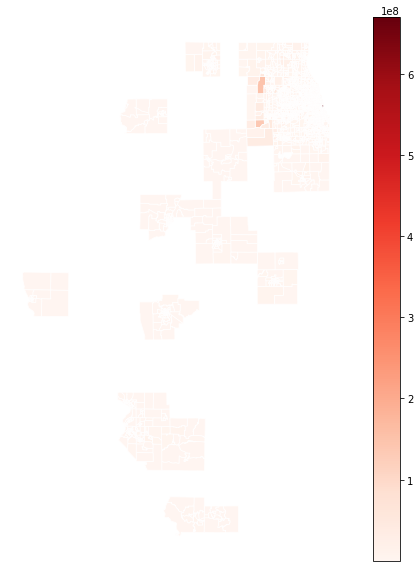

In [55]:
drawExposure(col = "inflow_exposure2", path = 'Plots/inflow_exposure2_map.png')

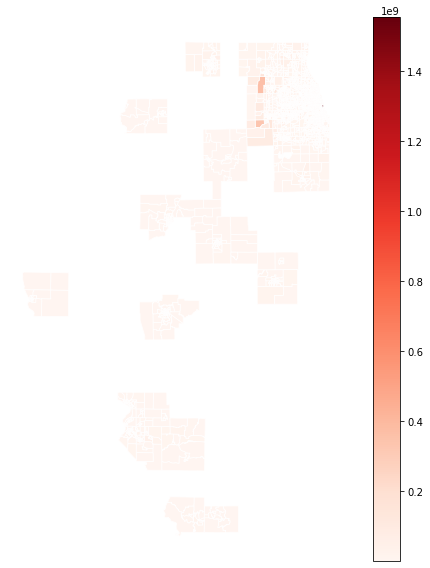

In [56]:
drawExposure(col = "inflow_exposure3", path = 'Plots/inflow_exposure3_map.png')

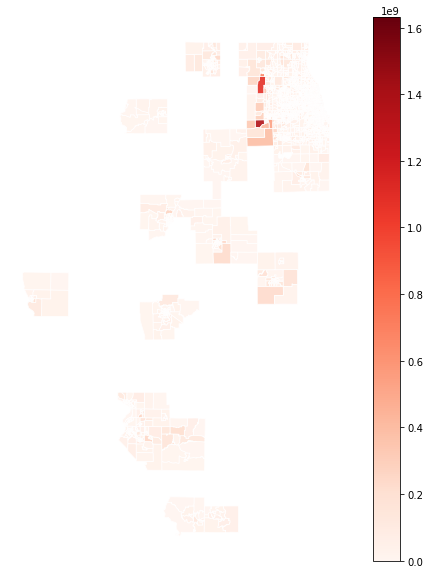

In [57]:
drawExposure(col = "inflow_exposure4", path = 'Plots/inflow_exposure4_map.png')